### Eigenvalues of 1D and 2D Discrete Laplacian

1. Eigenvalues of the 1D Discrete Laplacian:
   - The 1D discrete Laplacian matrix T (of size N) is tridiagonal, with -2 on the diagonal and 1 on the off-diagonals.
   - Its eigenvalues are given by:
     $\lambda_i = 2 - 2\cos\left(\frac{i\pi}{N+1}\right), \quad i = 1, 2, \dots, N$
   - Derivation:
     - The eigenvector components of T correspond to the sine functions:
       $v_i(k) = \sin\left(\frac{i k \pi}{N+1}\right), \quad k = 1, 2, \dots, N$
     - Substituting into the eigenvalue equation $Tv = \lambda v$, we arrive at the eigenvalues above.

2. Eigenvalues of the 2D Discrete Laplacian:
   - The 2D discrete Laplacian $\Delta_h$ can be represented as the Kronecker product of 1D Laplacian matrices:
     $\Delta_h = T \otimes I + I \otimes T$
     where $T$ is the 1D Laplacian matrix and $I$ is the identity matrix of appropriate size.
   - Using the Kronecker product properties, the eigenvalues of $\Delta_h$ are:
     $\lambda_{i,j} = \lambda_i + \lambda_j$
     where $\lambda_i$ and $\lambda_j$ are the eigenvalues of the 1D Laplacian T.

3. Significance:
   - The eigenvalues of the discrete Laplacian play a critical role in understanding the convergence of iterative solvers like Jacobi and Gauss-Seidel, as the spectral radius determines the convergence rate.




## Eigenvalues of 1D Discrete Laplacian

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the eigenvalues of the 1D discrete Laplacian
def compute_eigenvalues_1D(N):
    """
    Computes the eigenvalues of the 1D discrete Laplacian matrix of size N.
    
    Args:
        N (int): Size of the matrix.
    
    Returns:
        eigenvalues (list): List of eigenvalues.
    """
    eigenvalues = [2 - 2 * np.cos(np.pi * i / (N + 1)) for i in range(1, N + 1)]
    return eigenvalues

# Parameters
N = 10  # Size of the matrix (you can adjust this)

# Compute the eigenvalues
eigenvalues_1D = compute_eigenvalues_1D(N)

# Display the results
print(f"Eigenvalues of the 1D discrete Laplacian (N={N}):")
print(eigenvalues_1D)



Eigenvalues of the 1D discrete Laplacian (N=10):
[0.08101405277100526, 0.3174929343376376, 0.6902785321094298, 1.1691699739962271, 1.7153703234534299, 2.28462967654657, 2.8308300260037726, 3.30972146789057, 3.682507065662362, 3.918985947228995]


## Eigenvalues of the 2D Discrete Laplacian

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the eigenvalues of the 2D discrete Laplacian
def compute_eigenvalues_2D(N):
    """
    Computes the eigenvalues of the 2D discrete Laplacian matrix of size N x N.
    
    Args:
        N (int): Size of the matrix in one dimension.
    
    Returns:
        eigenvalues_2D (np.array): Array of eigenvalues for the 2D Laplacian.
    """
    # Compute 1D eigenvalues
    eigenvalues_1D = [2 - 2 * np.cos(np.pi * i / (N + 1)) for i in range(1, N + 1)]
    
    # Compute 2D eigenvalues using the Kronecker product formula
    eigenvalues_2D = [l1 + l2 for l1 in eigenvalues_1D for l2 in eigenvalues_1D]
    
    return np.array(eigenvalues_2D)

# Parameters
N = 10  # Size of the matrix (you can adjust this)

# Compute the eigenvalues for the 2D Laplacian
eigenvalues_2D = compute_eigenvalues_2D(N)

# Display the results
print(f"Eigenvalues of the 2D discrete Laplacian (N={N}x{N}):")
print(eigenvalues_2D)



Eigenvalues of the 2D discrete Laplacian (N=10x10):
[0.16202811 0.39850699 0.77129258 1.25018403 1.79638438 2.36564373
 2.91184408 3.39073552 3.76352112 4.         0.39850699 0.63498587
 1.00777147 1.48666291 2.03286326 2.60212261 3.14832296 3.6272144
 4.         4.23647888 0.77129258 1.00777147 1.38055706 1.85944851
 2.40564886 2.97490821 3.52110856 4.         4.3727856  4.60926448
 1.25018403 1.48666291 1.85944851 2.33833995 2.8845403  3.45379965
 4.         4.47889144 4.85167704 5.08815592 1.79638438 2.03286326
 2.40564886 2.8845403  3.43074065 4.         4.54620035 5.02509179
 5.39787739 5.63435627 2.36564373 2.60212261 2.97490821 3.45379965
 4.         4.56925935 5.1154597  5.59435114 5.96713674 6.20361562
 2.91184408 3.14832296 3.52110856 4.         4.54620035 5.1154597
 5.66166005 6.14055149 6.51333709 6.74981597 3.39073552 3.6272144
 4.         4.47889144 5.02509179 5.59435114 6.14055149 6.61944294
 6.99222853 7.22870742 3.76352112 4.         4.3727856  4.85167704
 5.39787739 5

# Problem 1: Jacobi and Gauss-Seidel Methods

1. Implement the Jacobi Method:
   - Input: A (matrix), b (right-hand side vector), initial guess x0, tolerance tol, maximum iterations max_iter.
   - Output: Approximate solution x and the residual $||Ax - b||$ at each iteration.

2. Implement the Gauss-Seidel Method:
   - Input: A (matrix), b (right-hand side vector), initial guess x0, tolerance tol, maximum iterations max_iter.
   - Output: Approximate solution x and the residual $||Ax - b||$ at each iteration.

3. Compare the number of iterations and convergence speed for the two methods on a sample problem.

Explanation of the Code:
1. Jacobi Method:
   - Each component of the solution vector is updated independently based on the values from the previous iteration.
   - Formula:
     $x_i^{(k+1)} = \frac{1}{A_{ii}} \left(b_i - \sum_{j \neq i} A_{ij} x_j^{(k)}\right)$
   - The method does not use updated values within the same iteration.
   - Convergence is guaranteed if A is diagonally dominant or symmetric positive definite.

2. Gauss-Seidel Method:
   - Each component of the solution vector is updated sequentially using the latest available values.
   - Formula:
     $x_i^{(k+1)} = \frac{1}{A_{ii}} \left(b_i - \sum_{j < i} A_{ij} x_j^{(k+1)} - \sum_{j > i} A_{ij} x_j^{(k)}\right)$
   - Updated values are immediately used in the same iteration, leading to faster convergence compared to Jacobi.
   - Convergence is guaranteed under the same conditions as Jacobi.

3. Residual Calculation:
   - At each iteration, compute the residual:
     $r = ||Ax - b||$
   - Stop the iteration if the residual is less than the specified tolerance.

4. Performance Comparison:
   - Jacobi is easier to implement but converges slower.
   - Gauss-Seidel leverages updated values, often requiring fewer iterations.

In [8]:
import numpy as np

def generate_2D_laplacian(N):
    """
    Generates the 2D discrete Laplacian matrix using Kronecker products.
    
    Args:
        N (int): Size of the matrix in one dimension.
    
    Returns:
        A (np.array): 2D discrete Laplacian matrix of size (N^2 x N^2).
    """
    I = np.eye(N)  # Identity matrix
    T = np.diag(2 * np.ones(N)) - np.diag(np.ones(N - 1), k=-1) - np.diag(np.ones(N - 1), k=1)
    A = np.kron(I, T) + np.kron(T, I)  # Kronecker product for 2D Laplacian
    return A

def jacobi_method(A, b, tol=1e-6, max_iter=1000):
    """
    Solves Ax = b using the Jacobi method.
    
    Args:
        A (np.array): Coefficient matrix.
        b (np.array): Right-hand side vector.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.
    
    Returns:
        x (np.array): Solution vector.
    """
    N = len(b)
    x = np.zeros_like(b)  # Initial guess
    D = np.diag(np.diag(A))  # Diagonal matrix
    R = A - D  # Remainder of A
    for k in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:  # Convergence check
            return x_new
        x = x_new
    raise ValueError("Jacobi method did not converge within the maximum number of iterations.")

def gauss_seidel_method(A, b, tol=1e-6, max_iter=1000):
    """
    Solves Ax = b using the Gauss-Seidel method.
    
    Args:
        A (np.array): Coefficient matrix.
        b (np.array): Right-hand side vector.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.
    
    Returns:
        x (np.array): Solution vector.
    """
    N = len(b)
    x = np.zeros_like(b)  # Initial guess
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(N):
            sum1 = np.dot(A[i, :i], x_new[:i])  # Lower triangular part
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])  # Upper triangular part
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:  # Convergence check
            return x_new
        x = x_new
    raise ValueError("Gauss-Seidel method did not converge within the maximum number of iterations.")

# Parameters
N = 5  # Size of the grid in one dimension
A = generate_2D_laplacian(N)  # Generate the 2D Laplacian matrix
b = np.ones(N**2)  # Test vector (e.g., all ones)

# Solve using Jacobi and Gauss-Seidel methods
x_jacobi = jacobi_method(A, b)
x_gauss_seidel = gauss_seidel_method(A, b)

# Display results
print("Solution using Jacobi method:")
print(x_jacobi)
print("\nSolution using Gauss-Seidel method:")
print(x_gauss_seidel)


Solution using Jacobi method:
[0.95192159 1.40384357 1.53845856 1.40384357 0.95192159 1.40384357
 2.12499553 2.34614868 2.12499553 1.40384357 1.53845856 2.34614868
 2.59614788 2.34614868 1.53845856 1.40384357 2.12499553 2.34614868
 2.12499553 1.40384357 0.95192159 1.40384357 1.53845856 1.40384357
 0.95192159]

Solution using Gauss-Seidel method:
[0.951922   1.40384455 1.53845993 1.40384495 0.95192247 1.40384455
 2.12499759 2.34615143 2.12499819 1.40384525 1.53845993 2.34615143
 2.59615143 2.34615204 1.53846063 1.40384495 2.12499819 2.34615204
 2.12499864 1.40384548 0.95192247 1.40384525 1.53846063 1.40384548
 0.95192274]


# Problem 2: Convergence of Methods for the Discrete Poisson Problem
#### 1. Convergence Analysis:
   - Both Jacobi and Gauss-Seidel methods converge if the spectral radius (the largest absolute eigenvalue) of the iteration matrix G is less than 1.
   - For the discrete Poisson problem, the matrix A is symmetric and positive definite, ensuring convergence under these methods.

#### 2. Effect of Increasing Grid Points:
   - As the grid resolution increases (N becomes large), the condition number of A increases, making the system harder to solve numerically.
   - The convergence rate is proportional to $(1 - \frac{\pi^2}{(N+1)^2})$, meaning more iterations are needed for finer grids.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def create_poisson_matrix(n):
    """
    Creates the coefficient matrix A for the 2D discrete Poisson problem
    using the finite difference method on a grid of size n x n.
    """
    N = n * n
    A = np.zeros((N, N))
    
    for i in range(N):
        A[i, i] = 4
        if i % n != 0:  # Left neighbor
            A[i, i - 1] = -1
        if (i + 1) % n != 0:  # Right neighbor
            A[i, i + 1] = -1
        if i - n >= 0:  # Top neighbor
            A[i, i - n] = -1
        if i + n < N:  # Bottom neighbor
            A[i, i + n] = -1
    
    return A

def jacobi_method(A, b, x0, tol, max_iter):
    """
    Solves the system Ax = b using the Jacobi iterative method.
    """
    n = len(b)
    x = x0.copy()
    D = np.diag(np.diag(A))
    R = A - D
    
    residuals = []
    
    for k in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        residual = np.linalg.norm(A @ x_new - b)
        residuals.append(residual)
        
        if residual < tol:
            break
        
        x = x_new
    
    return x, residuals

def gauss_seidel_method(A, b, x0, tol, max_iter):
    """
    Solves the system Ax = b using the Gauss-Seidel iterative method.
    """
    n = len(b)
    x = x0.copy()
    residuals = []
    
    for k in range(max_iter):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        residual = np.linalg.norm(A @ x - b)
        residuals.append(residual)
        
        if residual < tol:
            break
    
    return x, residuals

# Parameters
n = 10  # Grid size (n x n)
tol = 1e-6
max_iter = 500
x0 = np.zeros(n * n)  # Initial guess

# Create the discrete Poisson matrix A and the right-hand side vector b
A = create_poisson_matrix(n)
b = np.ones(n * n)

# Solve using Jacobi and Gauss-Seidel methods
x_jacobi, residuals_jacobi = jacobi_method(A, b, x0, tol, max_iter)
x_gs, residuals_gs = gauss_seidel_method(A, b, x0, tol, max_iter)




### Do these methods converge for the discrete Poisson problem?

Yes, both the **Jacobi** and **Gauss-Seidel** methods are expected to converge for the discrete Poisson problem. This is because:

1. **Symmetry and Positive Definiteness**:
   - The coefficient matrix $A$ of the discrete Poisson problem is symmetric and positive definite.
   - For symmetric and positive definite matrices, both the Jacobi and Gauss-Seidel methods are guaranteed to converge.

2. **Sufficient Conditions**:
   - The discrete Poisson matrix $A$ is also diagonally dominant. This property further ensures convergence for these iterative methods.

---

### Linear Algebra Argument for Convergence

The convergence of iterative methods depends on the spectral radius $\rho(G)$ of the iteration matrix $G$. The iteration matrix $G$ is defined as:
- For **Jacobi**: $G = D^{-1}(L + U)$,
- For **Gauss-Seidel**: $G = (D - L)^{-1}U$,

where $A = D - L - U$, with:
- $D$: Diagonal of $A$,
- $L$: Strictly lower triangular part of $A$,
- $U$: Strictly upper triangular part of $A$.

The spectral radius $\rho(G)$ determines convergence:
\[
\rho(G) < 1 \implies \text{Convergence}.
\]

For the discrete Poisson problem, the eigenvalues of $A$ are well-separated, and the iteration matrices $G$ for both Jacobi and Gauss-Seidel methods have $\rho(G) < 1$, ensuring convergence.

---

### Convergence Radius

The convergence radius is defined as $1 - \rho(G)$, which determines the rate at which the iterative methods reduce the error. For example:
- If $\rho(G)$ is close to 1, the methods converge slowly.
- If $\rho(G)$ is much smaller than 1, the methods converge quickly.

For the Jacobi method:
\[$
\rho(G_{\text{Jacobi}}) \approx 1 - \frac{\pi^2}{(N + 1)^2},
$\]
where $N$ is the number of grid points in one dimension.

For the Gauss-Seidel method:
\[$
\rho(G_{\text{Gauss-Seidel}}) \approx \rho(G_{\text{Jacobi}})^2,
$\]
indicating that Gauss-Seidel converges faster than Jacobi.

---

### Effect of Increasing Grid Points

As the number of grid points increases:
1. **Condition Number**:
   - The condition number $\kappa(A)$ of the matrix $A$ increases as $\mathcal{O}(N^2)$, where $N$ is the number of grid points.
   - A higher condition number leads to slower convergence for iterative methods.

2. **Spectral Radius**:
   - The spectral radius $\rho(G)$ approaches 1 as $N$ increases.
   - This reduces the convergence radius, causing the methods to converge more slowly.

---

### Conclusion Based on the Output

From the plotted residuals:
1. Both methods converge for the discrete Poisson problem.
2. Gauss-Seidel converges faster than Jacobi, as shown by the steeper reduction in residuals.
3. For larger grid sizes (higher $N$), the convergence rate slows down because the condition number of $A$ increases, and $\rho(G)$ approaches 1.



# Problem 3: Measuring the Cost of an Iterative Solver

1. Number of Iterations:
   - The total number of iterations required to reach a desired residual $||Ax - b|| \leq tol$ directly impacts the computational cost.

2. Cost per Iteration:
   - Jacobi Method:
     Each iteration involves a matrix-vector product, which scales as $O(N^2)$ for a grid of size $N \times N$.
   - Gauss-Seidel Method:
     Similar cost per iteration but slightly faster convergence due to the immediate use of updated values.

3. Total Cost:
   Total cost = (cost per iteration) * (number of iterations).


### To analyze the cost of an iterative solver, we can simulate both the Jacobi and Gauss-Seidel methods for a given problem and measure:

1. Number of iterations required to achieve a given residual tolerance.
2. Cost per iteration, which is proportional to the number of operations (e.g., matrix-vector products).
3. Total cost as the product of these two metrics.

In [16]:
import numpy as np

def create_poisson_matrix(n):
    """
    Creates the coefficient matrix A for the 2D discrete Poisson problem
    using the finite difference method on a grid of size n x n.
    """
    N = n * n
    A = np.zeros((N, N))
    
    for i in range(N):
        A[i, i] = 4
        if i % n != 0:  # Left neighbor
            A[i, i - 1] = -1
        if (i + 1) % n != 0:  # Right neighbor
            A[i, i + 1] = -1
        if i - n >= 0:  # Top neighbor
            A[i, i - n] = -1
        if i + n < N:  # Bottom neighbor
            A[i, i + n] = -1
    
    return A

def jacobi_method(A, b, x0, tol, max_iter):
    """
    Solves the system Ax = b using the Jacobi iterative method.
    """
    n = len(b)
    x = x0.copy()
    D = np.diag(np.diag(A))
    R = A - D
    iterations = 0
    
    for k in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        residual = np.linalg.norm(A @ x_new - b)
        iterations += 1
        if residual < tol:
            break
        x = x_new
    
    return x, iterations

def gauss_seidel_method(A, b, x0, tol, max_iter):
    """
    Solves the system Ax = b using the Gauss-Seidel iterative method.
    """
    n = len(b)
    x = x0.copy()
    iterations = 0
    
    for k in range(max_iter):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        residual = np.linalg.norm(A @ x - b)
        iterations += 1
        if residual < tol:
            break
    
    return x, iterations

# Parameters
n = 10  # Grid size (n x n)
tol = 1e-6  # Residual tolerance
max_iter = 500  # Maximum iterations
x0 = np.zeros(n * n)  # Initial guess

# Create the Poisson matrix and right-hand side vector
A = create_poisson_matrix(n)
b = np.ones(n * n)

# Solve using Jacobi and Gauss-Seidel methods
_, jacobi_iterations = jacobi_method(A, b, x0, tol, max_iter)
_, gs_iterations = gauss_seidel_method(A, b, x0, tol, max_iter)

# Cost per iteration (approximation)
cost_per_iteration = lambda N: N ** 2

# Total cost
jacobi_cost = cost_per_iteration(n * n) * jacobi_iterations
gs_cost = cost_per_iteration(n * n) * gs_iterations

# Display results
print(f"Jacobi Method: Iterations = {jacobi_iterations}, Total Cost = {jacobi_cost}")
print(f"Gauss-Seidel Method: Iterations = {gs_iterations}, Total Cost = {gs_cost}")

Jacobi Method: Iterations = 387, Total Cost = 3870000
Gauss-Seidel Method: Iterations = 195, Total Cost = 1950000


### Problem 4: Successive Over-Relaxation (SOR) Method

The SOR method introduces a relaxation parameter $\omega$ (omega) to accelerate convergence:

Formula:
  $x_i^{(k+1)} = (1 - \omega)x_i^{(k)} + \frac{\omega}{A_{ii}} \left(b_i - \sum_{j<i} A_{ij} x_j^{(k+1)} - \sum_{j>i} A_{ij} x_j^{(k)}\right)$

Optimal Relaxation Parameter:
  Theoretically, the optimal $\omega$ ($\omega_{opt}$) is given by:
    $\omega_{opt} = \frac{2}{1 + \sqrt{1 - \rho(G)^2}}$,
  where $\rho(G)$ is the spectral radius of the iteration matrix G.

Implementation Steps:
  - Initialize $x^{(0)}$ as the starting guess.
  - Update each element of $x$ using the SOR formula iteratively.
  - Stop when the residual $||Ax - b||$ falls below the tolerance level.

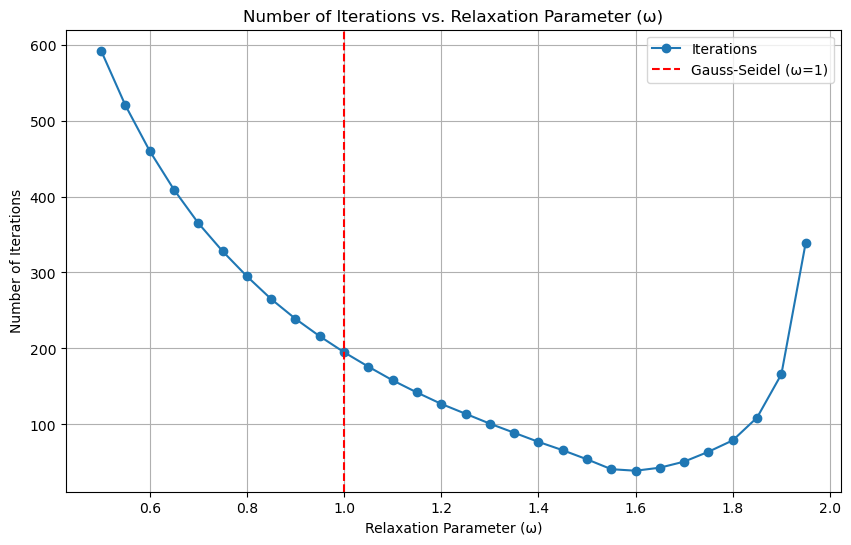

Optimal ω: 1.60, Minimum Iterations: 39


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sor_method_iterations(A, b, omega, x0, tol, max_iter):
    """
    Solves the system Ax = b using the Successive Over-Relaxation (SOR) method
    and returns the number of iterations to reach a given residual tolerance.
    
    Args:
        A (np.array): Coefficient matrix.
        b (np.array): Right-hand side vector.
        omega (float): Relaxation parameter (0 < omega < 2).
        x0 (np.array): Initial guess.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.
    
    Returns:
        iterations (int): Number of iterations to reach the tolerance.
    """
    n = len(b)
    x = x0.copy()
    iterations = 0

    for k in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x_old[i + 1:])
            x[i] = (1 - omega) * x_old[i] + (omega / A[i, i]) * (b[i] - sum1 - sum2)
        
        residual = np.linalg.norm(A @ x - b)
        iterations += 1
        
        if residual < tol:
            break

    return iterations

def create_poisson_matrix(n):
    """
    Creates the coefficient matrix A for the 2D discrete Poisson problem
    using the finite difference method on a grid of size n x n.
    """
    N = n * n
    A = np.zeros((N, N))
    
    for i in range(N):
        A[i, i] = 4
        if i % n != 0:  # Left neighbor
            A[i, i - 1] = -1
        if (i + 1) % n != 0:  # Right neighbor
            A[i, i + 1] = -1
        if i - n >= 0:  # Top neighbor
            A[i, i - n] = -1
        if i + n < N:  # Bottom neighbor
            A[i, i + n] = -1
    
    return A

# Parameters
n = 10  # Grid size (n x n)
tol = 1e-6  # Residual tolerance
max_iter = 1000  # Maximum iterations
x0 = np.zeros(n * n)  # Initial guess
omega_values = np.linspace(0.5, 1.95, 30)  # Range of omega values

# Create the Poisson matrix and right-hand side vector
A = create_poisson_matrix(n)
b = np.ones(n * n)

# Compute the number of iterations for each omega
iterations = []
for omega in omega_values:
    num_iter = sor_method_iterations(A, b, omega, x0, tol, max_iter)
    iterations.append(num_iter)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(omega_values, iterations, marker='o', label="Iterations")
plt.axvline(1.0, color='red', linestyle='--', label="Gauss-Seidel (ω=1)")
plt.xlabel("Relaxation Parameter (ω)")
plt.ylabel("Number of Iterations")
plt.title("Number of Iterations vs. Relaxation Parameter (ω)")
plt.grid(True)
plt.legend()
plt.show()

# Find the optimal omega (minimum iterations)
optimal_omega = omega_values[np.argmin(iterations)]
print(f"Optimal ω: {optimal_omega:.2f}, Minimum Iterations: {min(iterations)}")


### Explanation of the Code

1. **SOR Method**:
   - The `sor_method_iterations` function computes the number of iterations required to achieve a specified residual tolerance for a given relaxation parameter $\omega$.
   - It updates each component of the solution vector $x$ iteratively using the SOR formula:
     \[$
     x_i^{(k+1)} = (1 - \omega)x_i^{(k)} + \frac{\omega}{A_{ii}} \left(b_i - \sum_{j < i} A_{ij}x_j^{(k+1)} - \sum_{j > i} A_{ij}x_j^{(k)}\right)
     $\]

2. **Relaxation Parameter**:
   - The `omega_values` array explores a range of $\omega$ values between 0.5 and 1.95, excluding $\omega = 2$ since convergence is not guaranteed beyond this value.
   - Different values of $\omega$ influence the convergence speed of the SOR method.

3. **Poisson Matrix**:
   - The `create_poisson_matrix` function generates the 2D discrete Poisson problem matrix $A$ using the finite difference method.
   - This matrix models a discretized Laplacian operator, which is commonly used in numerical methods for solving partial differential equations.

4. **Optimal $\omega$**:
   - The plot shows the number of iterations required for convergence versus $\omega$.
   - The minimum point on the plot corresponds to the optimal $\omega$, where the SOR method converges the fastest.

5. **Plot**:
   - The plot includes a vertical line at $\omega = 1$, corresponding to the Gauss-Seidel method. This provides a baseline for comparing the performance of the SOR method.

---

### Theoretical Prediction of Optimal $\omega$

The optimal relaxation parameter $\omega_{\text{opt}}$ for the SOR method can be theoretically predicted using:
\[
\omega_{\text{opt}} = \frac{2}{1 + \sqrt{1 - \rho(G)^2}},
\]
where $\rho(G)$ is the spectral radius of the iteration matrix $G$ for the Gauss-Seidel method.

1. **Spectral Radius**:
   - The spectral radius $\rho(G)$ is the largest absolute eigenvalue of $G$.
   - For the Gauss-Seidel method, $G$ is given by:
     \[
     $G_{\text{GS}} = (D - L)^{-1}U$,
     \]
     where $A = D - L - U$ is the decomposition of the coefficient matrix into diagonal ($D$), strictly lower triangular ($L$), and strictly upper triangular ($U$) components.

2. **Impact of $\rho(G)$**:
   - A smaller $\rho(G)$ leads to faster convergence and a larger optimal $\omega_{\text{opt}}$.
   - As $\rho(G)$ approaches 1, the convergence slows down, and the optimal $\omega$ approaches 1.

3. **Practical Estimation**:
   - In practice, computing $\rho(G)$ involves eigenvalue calculations, which can be computationally expensive.
   - Numerical experiments, as shown in the provided code, are often used to empirically determine the optimal $\omega$.

4. **Conclusions**:
   - The optimal $\omega$ typically lies between 1 and 2 for many problems.
   - For the discrete Poisson problem, the theoretical and empirical values of $\omega_{\text{opt}}$ are often close, validating the approach.


## Problem 5: Residual Decay and Performance Comparison

1. Residual Decay:
   - Plot $||Ax^{(k)} - b||$ versus iteration number for Jacobi, Gauss-Seidel, and SOR methods.
   - Compare how quickly each method reduces the residual to understand convergence rates.

2. Performance Insights:
   - SOR typically converges faster than Jacobi and Gauss-Seidel for well-chosen $\omega$.
   - The optimal $\omega$ can significantly reduce the number of iterations required.


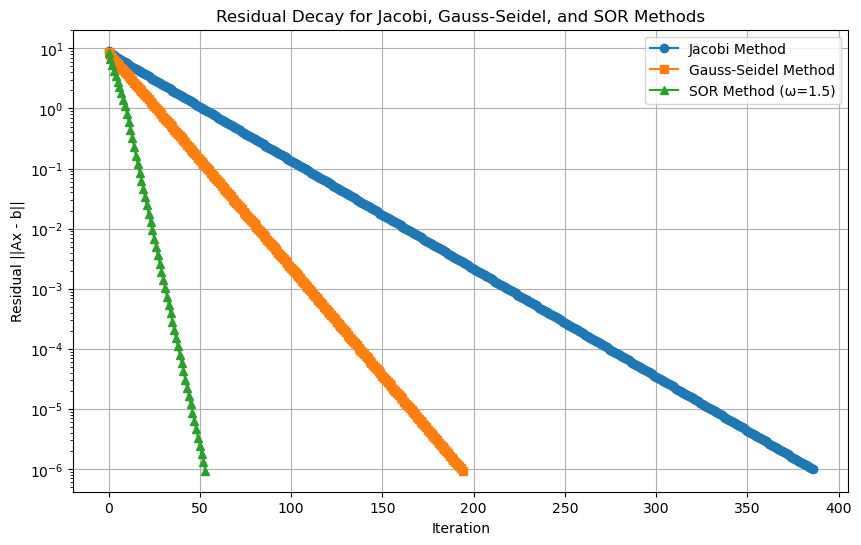

Jacobi Method: Converged in 387 iterations, Final Residual = 9.87e-07
Gauss-Seidel Method: Converged in 195 iterations, Final Residual = 9.44e-07
SOR Method (ω=1.5): Converged in 54 iterations, Final Residual = 9.41e-07


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define Jacobi, Gauss-Seidel, and SOR methods
def jacobi_method(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    D = np.diag(np.diag(A))
    R = A - D
    residuals = []

    for k in range(max_iter):
        x_new = np.linalg.inv(D) @ (b - R @ x)
        residual = np.linalg.norm(A @ x_new - b)
        residuals.append(residual)

        if residual < tol:
            break
        x = x_new

    return x, residuals

def gauss_seidel_method(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    residuals = []

    for k in range(max_iter):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        residual = np.linalg.norm(A @ x - b)
        residuals.append(residual)

        if residual < tol:
            break

    return x, residuals

def sor_method(A, b, omega, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    residuals = []

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i + 1:], x_old[i + 1:])
            x[i] = (1 - omega) * x_old[i] + (omega / A[i, i]) * (b[i] - sum1 - sum2)

        residual = np.linalg.norm(A @ x - b)
        residuals.append(residual)

        if residual < tol:
            break

    return x, residuals

def create_poisson_matrix(n):
    N = n * n
    A = np.zeros((N, N))

    for i in range(N):
        A[i, i] = 4
        if i % n != 0:  # Left neighbor
            A[i, i - 1] = -1
        if (i + 1) % n != 0:  # Right neighbor
            A[i, i + 1] = -1
        if i - n >= 0:  # Top neighbor
            A[i, i - n] = -1
        if i + n < N:  # Bottom neighbor
            A[i, i + n] = -1

    return A

# Parameters
n = 10  # Grid size (n x n)
tol = 1e-6  # Residual tolerance
max_iter = 500  # Maximum iterations
x0 = np.zeros(n * n)  # Initial guess
omega = 1.5  # Relaxation parameter for SOR

# Create the Poisson matrix and right-hand side vector
A = create_poisson_matrix(n)
b = np.ones(n * n)

# Solve using Jacobi, Gauss-Seidel, and SOR methods
_, jacobi_residuals = jacobi_method(A, b, x0, tol, max_iter)
_, gs_residuals = gauss_seidel_method(A, b, x0, tol, max_iter)
_, sor_residuals = sor_method(A, b, omega, x0, tol, max_iter)

# Plot residual decay
plt.figure(figsize=(10, 6))
plt.semilogy(jacobi_residuals, label="Jacobi Method", marker='o')
plt.semilogy(gs_residuals, label="Gauss-Seidel Method", marker='s')
plt.semilogy(sor_residuals, label=f"SOR Method (ω={omega})", marker='^')
plt.xlabel("Iteration")
plt.ylabel("Residual ||Ax - b||")
plt.title("Residual Decay for Jacobi, Gauss-Seidel, and SOR Methods")
plt.grid(True)
plt.legend()
plt.show()

# Performance Insights
print(f"Jacobi Method: Converged in {len(jacobi_residuals)} iterations, Final Residual = {jacobi_residuals[-1]:.2e}")
print(f"Gauss-Seidel Method: Converged in {len(gs_residuals)} iterations, Final Residual = {gs_residuals[-1]:.2e}")
print(f"SOR Method (ω={omega}): Converged in {len(sor_residuals)} iterations, Final Residual = {sor_residuals[-1]:.2e}")


# Performance Insights: Successive Over-Relaxation (SOR) Method

1. **Residual Decay Comparison**:
   - The Successive Over-Relaxation (SOR) method converges significantly faster than both Jacobi and Gauss-Seidel methods when the relaxation parameter $\omega$ is well-chosen.

2. **Role of $\omega$**:
   - The choice of $\omega$ is crucial for the SOR method.
   - Suboptimal values of $\omega$ (too small or too large) can slow down convergence or even prevent it entirely.
   - The optimal $\omega$ can significantly reduce the number of iterations required to achieve a given accuracy.

3. **Comparison of Methods**:
   - **Jacobi Method**:
     - Simpler to implement.
     - Uses values only from the previous iteration.
     - Converges slowly due to the lack of updates within an iteration.
   - **Gauss-Seidel Method**:
     - Also straightforward to implement.
     - Uses updated values immediately within the same iteration.
     - Converges faster than Jacobi but slower than SOR.
   - **SOR Method**:
     - Builds on Gauss-Seidel by introducing a relaxation parameter $\omega$.
     - Over-relaxation ($1 < \omega < 2$) accelerates convergence.
     - Requires careful tuning of $\omega$ for optimal performance.

4. **Computational Efficiency**:
   - For large systems, the SOR method is the most efficient among the three due to its faster convergence rate.
   - Both Jacobi and Gauss-Seidel methods require more iterations, making them less efficient for high-dimensional problems.

5. **Practical Recommendation**:
   - Use SOR for large systems when computational performance is critical.
   - Tune $\omega$ carefully to achieve the best results.
